#**pytorch_training_pipeline_using_dataset_and_dataloader**
**`pytorch_training_pipeline_using_dataset_and_dataloader`** Video#06

**Source Link:** https://www.youtube.com/playlist?list=PLKnIA16_Rmvboy8bmDCjwNHgTaYH2puK7

**dataset_and_dataloader_demo Notebook on Colab:** https://colab.research.google.com/drive/1P3B0pbjkSlA1UnwXtfXt3O_lhWO8s-x1

**Description Note:** https://drive.google.com/drive/folders/1EQW_VFecvc1E5A_8dw_oFnAAlUagHktB

Start from 13/12/2024

#**Topic**

***************************************
**Classes**

 **`1. Mini Batch Gradient Decent:` Divede data into small amount of chunk**

 **`2. Dataset Class:` This class know the memory location of datapoint**

 **`3. Data Loader Class:` How many number of batches will be create and each batch will be how many datapoint**

**Methods**

 **`1. Constructor(Magic Method) method:` How to Load Data from Memory**

 **`2. len method:` How many datapoint in the loaded dataset and how many batches will be created**

 **`3. getitem method:` Input the value of Index then this method will rettrive data from given index**

 ***************************************

**Problem with Batch Gradient Decent**

1. `No standard interface for data:`_____There is no standard way to include data to create Tensors

2. `No easy way to apply transformations:`_____There is no exact way how and where to implement code for the  transformations

3. `Shuffling and sampling:`_____There is no exact way how and where to implement code for Shuffling and sampling

4. `Batch management & Parallelization:`_____How to apply Parallelization and worker assign number batches and their size

**Apply Data Transformation in `getitem`**

**`For Image Data Transformation`**

1. Resize

2. Flatten (Gray Scale)

3. Data Augmentation (if imbalance distribution)

**`For Text Data Transformation`**

1. Convert to Lower case

2. Apply Lemmatizer

3. Stop words removal

**`Sampler:` Randomly shufle loaded index of datapoints** Note: If shufle=False then index of datapoints will be Sequential not Random

**`Collate Method:` Collect and combine sample of data and create a Batch** Note: Padding also apply in the collate_fn if matrix are not equal

**`drop_last:` After creating equally distributed batches, rest of the inequal batch will be drop using drop_last function**

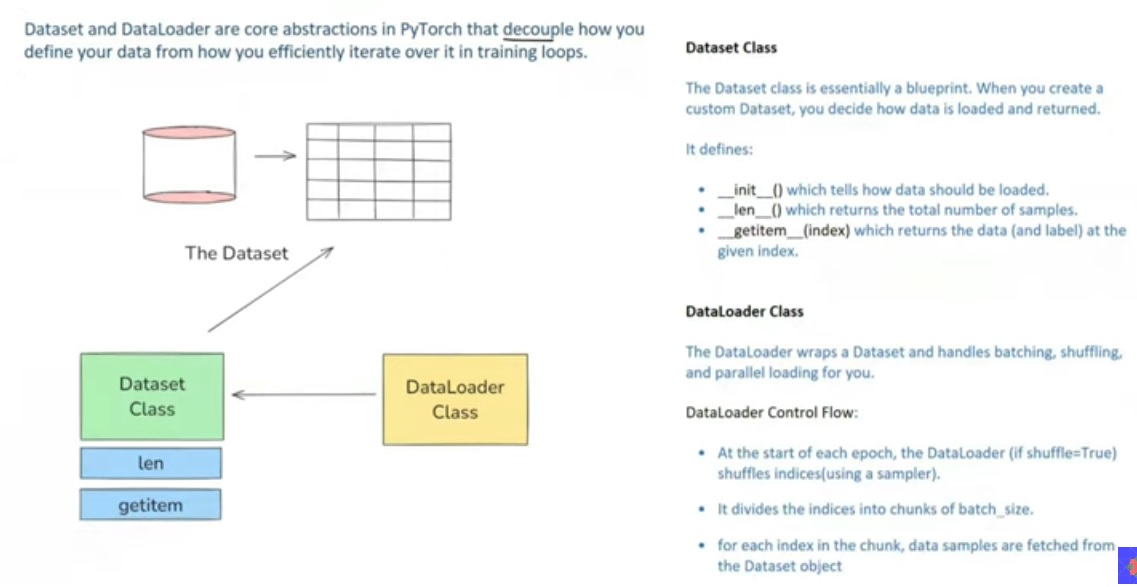

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace= True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

### scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.77505166, -0.88804044, -0.78805547, ..., -0.46693893,
        -0.3621201 , -0.88685889],
       [-0.32200779, -1.24678993, -0.39643193, ..., -1.20934158,
        -1.24376133, -0.98713445],
       [ 2.53608374,  0.65111062,  2.41960513, ...,  1.7830937 ,
         1.05253446,  0.42593795],
       ...,
       [-0.72751002, -0.20063011, -0.75477762, ..., -0.49516945,
         0.46529012, -0.29170986],
       [ 0.21213651, -0.02935616,  0.18471306, ...,  0.49620237,
         0.0810247 ,  0.03838645],
       [-0.74428942, -1.10791916, -0.7235289 , ..., -0.70089187,
        -0.8997818 , -0.14481971]])

In [ ]:
y_train

,diagnosis
137,B
309,B
164,M
63,B
41,M
...,...
414,M
43,M
463,B
291,B


### Label Encoding

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

### Numpy arrays to PyTorch tensors

In [ ]:
X_train_tensor = torch.from_numpy(X_train.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
y_train_tensor.shape

torch.Size([455])

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = features
    self.labels = labels

  def __len__(self):

    return len(self.features)

  def __getitem__(self, idx):

    return self.features[idx], self.labels[idx]



In [ ]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_dataset[10]

(tensor([-4.0258e-04,  3.0162e-01, -2.7792e-03, -1.2345e-01, -5.0003e-01,
          1.1059e-01, -4.8453e-01, -4.8588e-01, -1.0994e+00, -3.9506e-01,
         -2.0923e-01, -3.6745e-01, -7.0442e-02, -2.1202e-01, -9.9899e-01,
          4.1334e-01, -1.1986e-01,  2.5861e-01, -5.3478e-01, -3.9632e-01,
          1.6252e-02,  2.5711e-01,  1.2005e-01, -1.1148e-01, -7.3959e-01,
          5.3461e-01, -1.0349e-01,  2.7096e-01, -5.8214e-01, -2.9442e-01]),
 tensor(0.))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

### Defining the model

In [ ]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

### Important Parameters

In [ ]:
learning_rate = 0.1
epochs = 25

In [ ]:
# create model
model = MySimpleNN(X_train_tensor.shape[1])

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# define loss function
loss_function = nn.BCELoss()

### Training Pipeline

In [ ]:

# define loop
for epoch in range(epochs):

  for batch_features, batch_labels in train_loader:

    # forward pass
    y_pred = model(batch_features)

    # loss calculate
    loss = loss_function(y_pred, batch_labels.view(-1,1))

    # clear gradients
    optimizer.zero_grad()

    # backward pass
    loss.backward()

    # parameters update
    optimizer.step()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

Epoch: 1, Loss: 0.16266293823719025
Epoch: 2, Loss: 0.050281014293432236
Epoch: 3, Loss: 0.5068875551223755
Epoch: 4, Loss: 0.07713241875171661
Epoch: 5, Loss: 0.06390754878520966
Epoch: 6, Loss: 0.05827119201421738
Epoch: 7, Loss: 0.18918250501155853
Epoch: 8, Loss: 0.09293217211961746
Epoch: 9, Loss: 0.09022160619497299
Epoch: 10, Loss: 0.023956719785928726
Epoch: 11, Loss: 0.02334115467965603
Epoch: 12, Loss: 0.01349515002220869
Epoch: 13, Loss: 0.07559416443109512
Epoch: 14, Loss: 0.1467479020357132
Epoch: 15, Loss: 0.08669764548540115
Epoch: 16, Loss: 0.3455123007297516
Epoch: 17, Loss: 0.04768885299563408
Epoch: 18, Loss: 0.013246601447463036
Epoch: 19, Loss: 0.08638149499893188
Epoch: 20, Loss: 0.06556333601474762
Epoch: 21, Loss: 0.08035345375537872
Epoch: 22, Loss: 0.009921782650053501
Epoch: 23, Loss: 0.18035922944545746
Epoch: 24, Loss: 0.05352584645152092
Epoch: 25, Loss: 0.007614626549184322


### Evaluation

In [ ]:
# Model evaluation using test_loader
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.8).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')


Accuracy: 0.9766
